# Proyek Analisis Data: Bike Sharing
- **Nama:** Farell Kurniawan
- **Email:** farellkurniawan17108@gmail.com
- **ID Dicoding:** farellkurniawan17

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?
- **Pertanyaan 2:** Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# Menampilkan 5 baris pertama untuk masing-masing dataset
print(day_df.head())
print(hour_df.head())

5 Baris Pertama day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

5

**Insight:**
- Dataset **day.csv** memberikan informasi agregat harian.
- Dataset **hour.csv** menyediakan data granular per jam.
- Kedua dataset memiliki fitur seperti tanggal, kondisi cuaca, dan indikator hari libur/kerja.

### Assessing Data

In [5]:
print(day_df.info())
print(day_df.describe())

print(hour_df.info())
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
- Data memiliki tipe data yang sesuai dan tidak terdapat banyak missing values.
- Statistik deskriptif memberikan gambaran sebaran data yang bervariasi, sehingga terdapat potensi insight mendalam untuk analisis lebih lanjut.


### Cleaning Data

In [6]:
# Mengonversi kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek missing values
print("\nCek Missing Values pada day_df:")
print(day_df.isnull().sum())
print("\nCek Missing Values pada hour_df:")
print(hour_df.isnull().sum())


Cek Missing Values pada day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Missing Values pada hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Kolom `dteday` berhasil dikonversi ke format datetime, memudahkan analisis time series.
- Tidak ada missing values yang signifikan, sehingga dataset siap untuk analisis selanjutnya.

## Exploratory Data Analysis (EDA)


### Explore ...

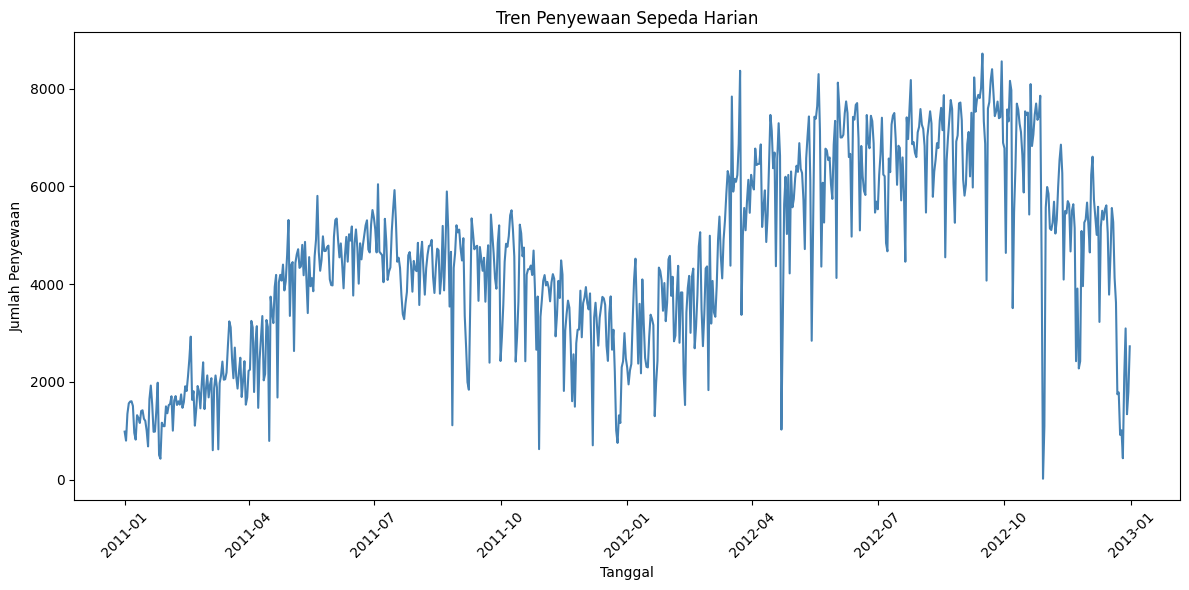

In [11]:
# Visualisasi tren penyewaan sepeda harian
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', color='steelblue')
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi tren harian menunjukkan fluktuasi penyewaan sepeda.
- Terlihat adanya pola musiman dan kemungkinan adanya pengaruh faktor eksternal seperti cuaca atau hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?

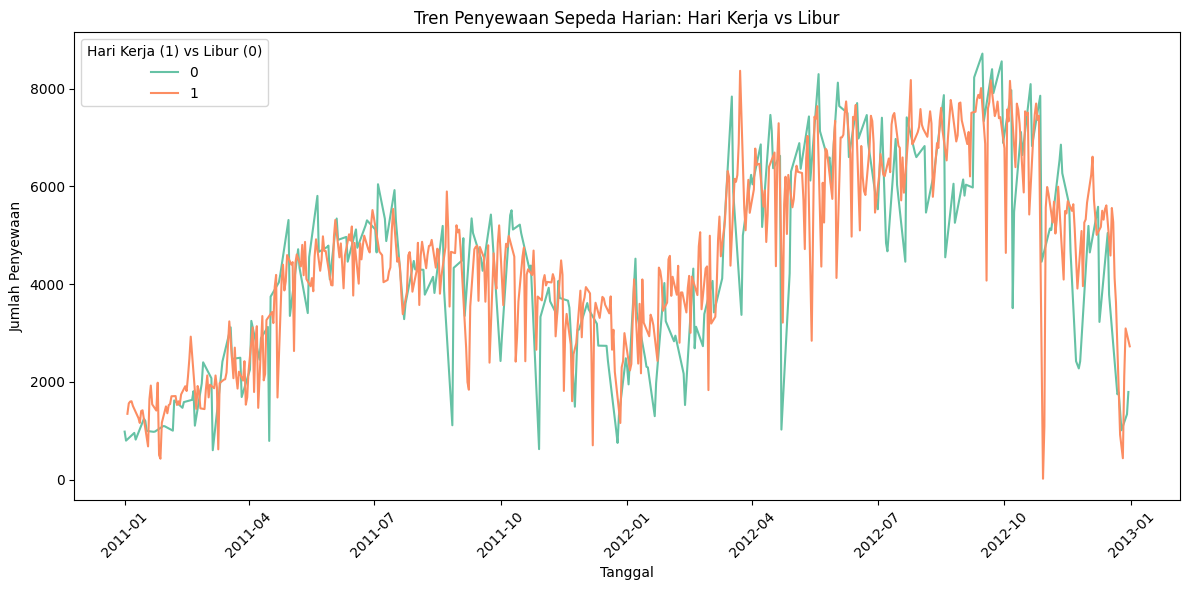

<ipython-input-12-a56deb1ba0f7>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')


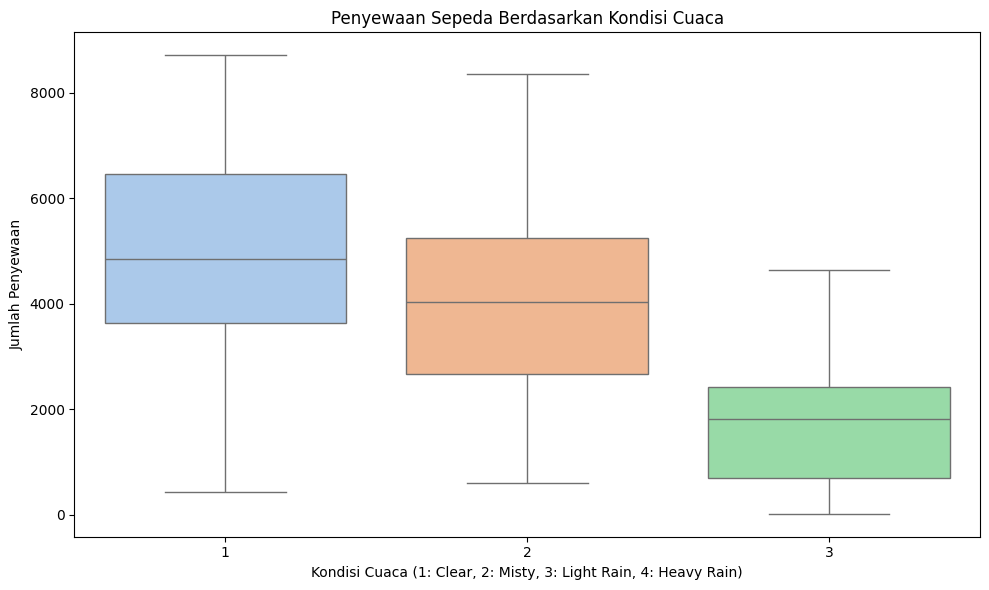

In [12]:
# Visualisasi 1: Tren Harian & Pengaruh Hari Kerja vs Libur
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='workingday', palette='Set2')
plt.title('Tren Penyewaan Sepeda Harian: Hari Kerja vs Libur')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title="Hari Kerja (1) vs Libur (0)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi 2: Penyewaan Sepeda Berdasarkan Kondisi Cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='pastel')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Misty, 3: Light Rain, 4: Heavy Rain)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

**Insight:**
- Tren harian menunjukkan perbedaan signifikan antara hari kerja dan hari libur.
- Penyewaan cenderung lebih tinggi pada kondisi cuaca yang lebih baik (misalnya, weathersit=1) dan lebih rendah pada kondisi cuaca ekstrem.
- Hal ini mengindikasikan bahwa manajemen operasional dapat mempertimbangkan cuaca dan kalender kerja/libur untuk pengaturan armada.

### Pertanyaan 2:
Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?

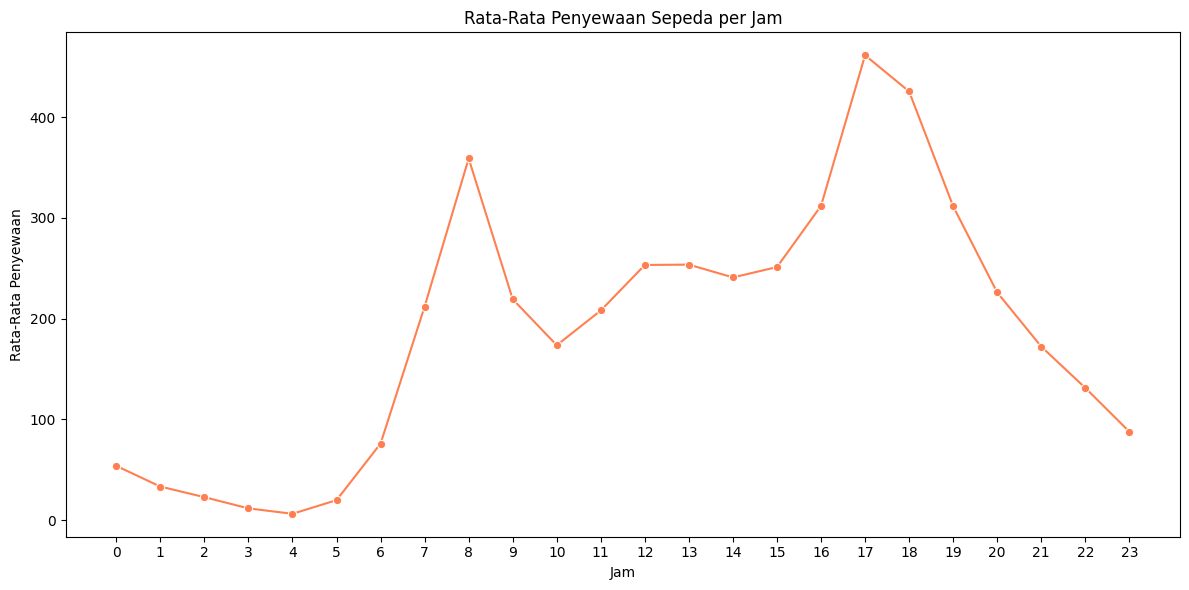

<ipython-input-13-74228431b2df>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, ci=None, color='mediumseagreen')


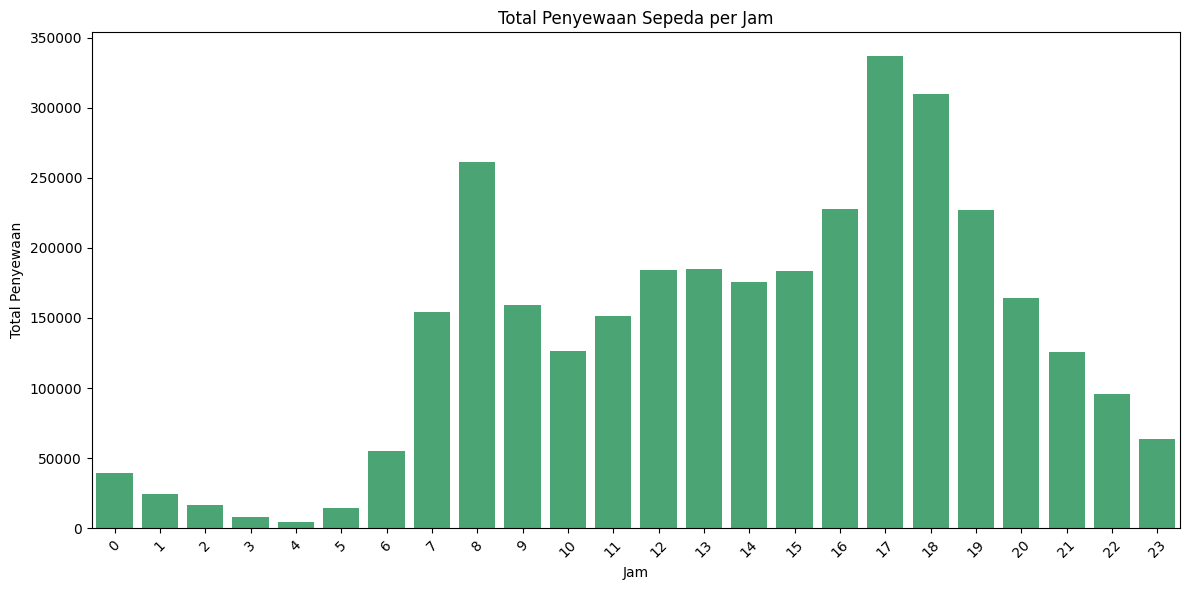

In [13]:
# Menghitung rata-rata penyewaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi 1: Rata-Rata Penyewaan Sepeda per Jam (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o', color='coral')
plt.title('Rata-Rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Visualisasi 2: Total Penyewaan Sepeda per Jam (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, ci=None, color='mediumseagreen')
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Dari visualisasi line plot, dapat dilihat jam-jam dengan rata-rata penyewaan tertinggi, yang kemungkinan merupakan jam sibuk (misalnya, pagi dan sore hari).
- Bar plot total penyewaan per jam memberikan gambaran volume penyewaan dalam angka nyata.
- Informasi ini penting untuk pengaturan armada, penjadwalan pemeliharaan, dan optimasi layanan.

## Analisis Lanjutan (Opsional)

Pengelompokkan Hari Berdasarkan Volume Penyewaan

(Tanpa menggunakan algoritma machine learning kompleks, cukup segmentasi sederhana)

<ipython-input-14-c45abe544050>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=avg_by_day, palette='viridis')


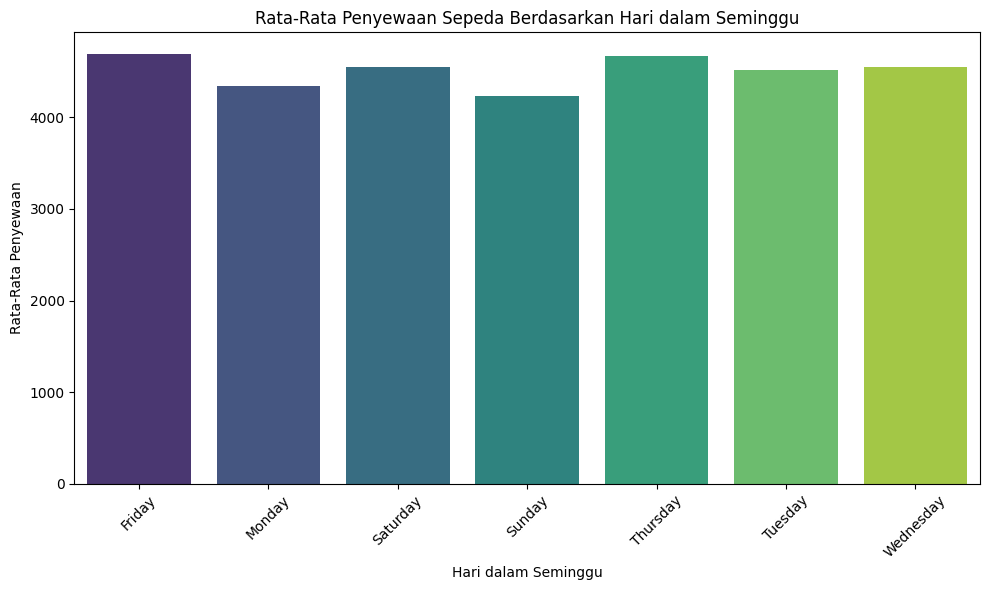

In [14]:
day_df['day_of_week'] = day_df['dteday'].dt.day_name()
avg_by_day = day_df.groupby('day_of_week')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=avg_by_day, palette='viridis')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Analisis tambahan ini membantu untuk melihat apakah terdapat perbedaan signifikan dalam penyewaan antar hari (misalnya, weekend vs weekday).


## Conclusion

1.  Conclution **Pertanyaan 1**: Bagaimana tren penggunaan sepeda harian selama periode tertentu dan apakah faktor cuaca serta hari kerja/holiday berpengaruh signifikan terhadapnya?
  - Tren harian menunjukkan adanya fluktuasi penyewaan sepeda yang signifikan.
  - Data mengindikasikan bahwa hari kerja dan libur memiliki pola yang berbeda, di mana penyewaan cenderung lebih tinggi pada hari kerja dan saat kondisi cuaca baik.
  - Informasi ini dapat membantu dalam pengaturan armada dan penjadwalan operasional yang optimal.

2. Conclution **Pertanyaan 2**: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari, dan pada jam berapa terdapat puncak penggunaan?
    - Analisis per jam mengungkapkan adanya puncak penggunaan pada waktu tertentu, misalnya pada pagi dan sore hari, yang mungkin berkaitan dengan jam berangkat dan pulang kerja.
    - Dengan mengetahui jam puncak, perusahaan dapat menyesuaikan distribusi sepeda dan meningkatkan efisiensi layanan, termasuk dalam penjadwalan pemeliharaan.

## Penutup

Dokumentasi lengkap, insight di setiap tahapan, serta visualisasi yang jelas diharapkan dapat memberikan gambaran yang komprehensif atas analisis data Bike Sharing. Selanjutnya, dashboard sederhana telah dibuat menggunakan Streamlit (lihat file dashboard.py) dan sudah dideploy pada Streamlit Cloud (tautan dashboard terdapat di file url.txt).